# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [3]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [ ]:
# Importing the file porter_data_1.csv
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Linear Regression/porter_data_1.csv")
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [ ]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

# Converting columns 'created_at' and 'actual_delivery_time' to datetime
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], errors='coerce')

df.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                       4   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                      46   
2        2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                      36   
3        1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                      38   
4        1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             3.0            4      4771                   3             820   
3             1.0            1      1525                   1            1525   
4             1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  
0                      21.0     34.44  
1                       2.0     27.60  
2                      18.0     11.56  
3                       8.0     31.80  
4                       7.0      8.20

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [ ]:
# Convert categorical features to category type

# Converting categorical fields to 'category' dtype
categorical_columns = ['market_id', 'store_primary_category', 'order_protocol']

for col in categorical_columns:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [ ]:
# Calculate time taken in minutes

# Calculating the time taken (in minutes)
df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

df.head()


market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  
0                      21.0     34.44        47.0  
1                       2.0     27.60        44.0  
2                      18.0     11.56        55.0  
3                       8.0     31.80        59.0  
4                       7.0      8.20        46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [ ]:
# Extract the hour and day of week from the 'created_at' timestamp
# Extracting hour and day of week
df['order_hour'] = df['created_at'].dt.hour
df['order_dayofweek'] = df['created_at'].dt.dayofweek  # Monday=0, Sunday=6

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['order_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

df.head()


market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  order_hour  \
0                      21.0     34.44        47.0          22   
1                       2.0     27.60        44.0          21   
2                      18.0     11.56        55.0           0   
3                       8.0     31.80        59.0           3   
4                       7.0      8.20        46.0           2   

   order_dayofweek  isWeekend  
0                4          0  
1                1          0  
2                0          0  
3                3          0  
4                1          0

In [4]:
# Drop unnecessary columns
# Dropping the column 'created_at' and 'actual_delivery_time' as we have already extracted the useful information from those columns.
df.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)
df.head()

market_id  store_primary_category  order_protocol  total_items  subtotal  \
0        1.0                       4             1.0            4      3441   
1        2.0                      46             2.0            1      1900   
2        2.0                      36             3.0            4      4771   
3        1.0                      38             1.0            1      1525   
4        1.0                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  time_taken  \
0                14.0                      21.0     34.44        47.0   
1                 2.0                       2.0     27.60        44.0   
2                 6.0                      18.0     11.56        55.0   
3                 6.0                       8.0     31.80        59.0   
4                 5.0                       7.0      8.20        46.0   

   order_hour  order_dayofweek  isWeekend  
0          22                4          0  
1          21                1          0  
2           0                0          0  
3           3                3          0  
4           2                1          0

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [5]:
# Define target variable (y) and features (X)
# Our target variable y is 'time_taken' and all other columns are X
X = df.drop(columns=['time_taken'])
y = df['time_taken']

X.shape

(175777, 15)

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [6]:
# Split data into training and testing sets

# Performing train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 140621
Test set size: 35156


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [7]:
# Define numerical and categorical columns for easy EDA and data manipulation

# Define numerical columns (excluding the target for now)
numerical_cols = ['total_items', 'subtotal', 'order_hour', 'order_dayofweek']

# Define categorical columns
categorical_cols = ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['total_items', 'subtotal', 'order_hour', 'order_dayofweek']
Categorical columns: ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

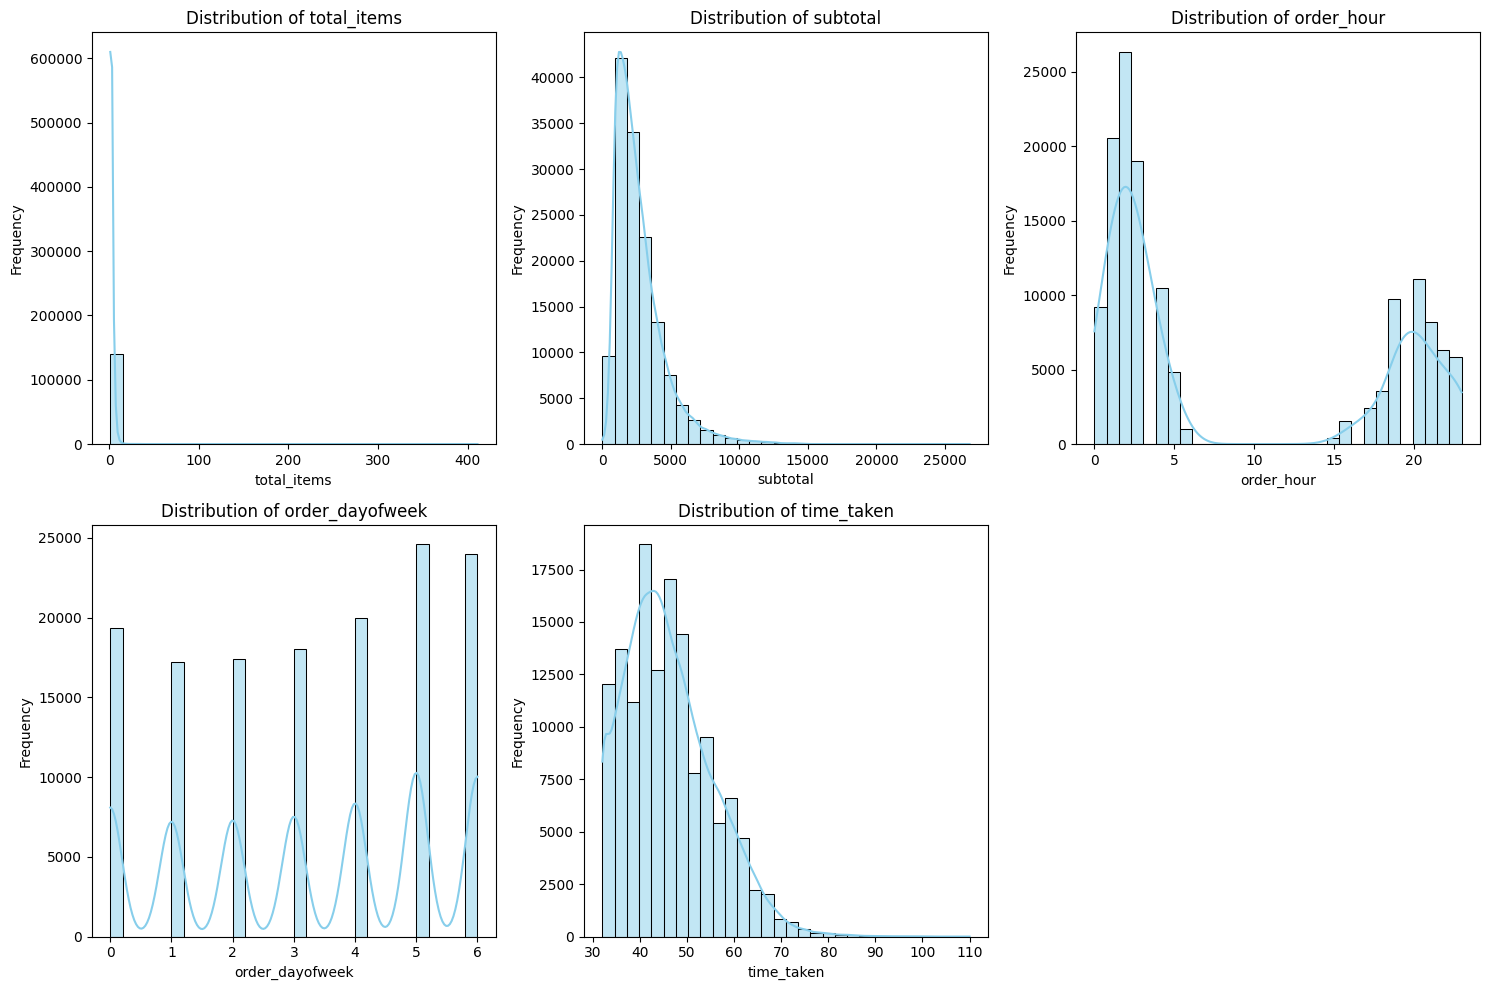

In [8]:
# Plot distributions for all numerical columns

# Combine X_train and y_train
train_data = X_train.copy()
train_data['time_taken'] = y_train

# Add 'delivery_duration' to numerical_cols temporarily for plotting
plot_cols = numerical_cols + ['time_taken']

# Plot histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(plot_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(train_data[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

<ipython-input-9-4e429177b500>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train, x=col, order=X_train[col].value_counts().index, palette='Set2')
<ipython-input-9-4e429177b500>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train, x=col, order=X_train[col].value_counts().index, palette='Set2')
<ipython-input-9-4e429177b500>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train, x=col, order=X_train[col].value_counts().index, palette='Set2')
<ipython-input-9-4e429177b500>:7: FutureWarning: 

Passing `palette

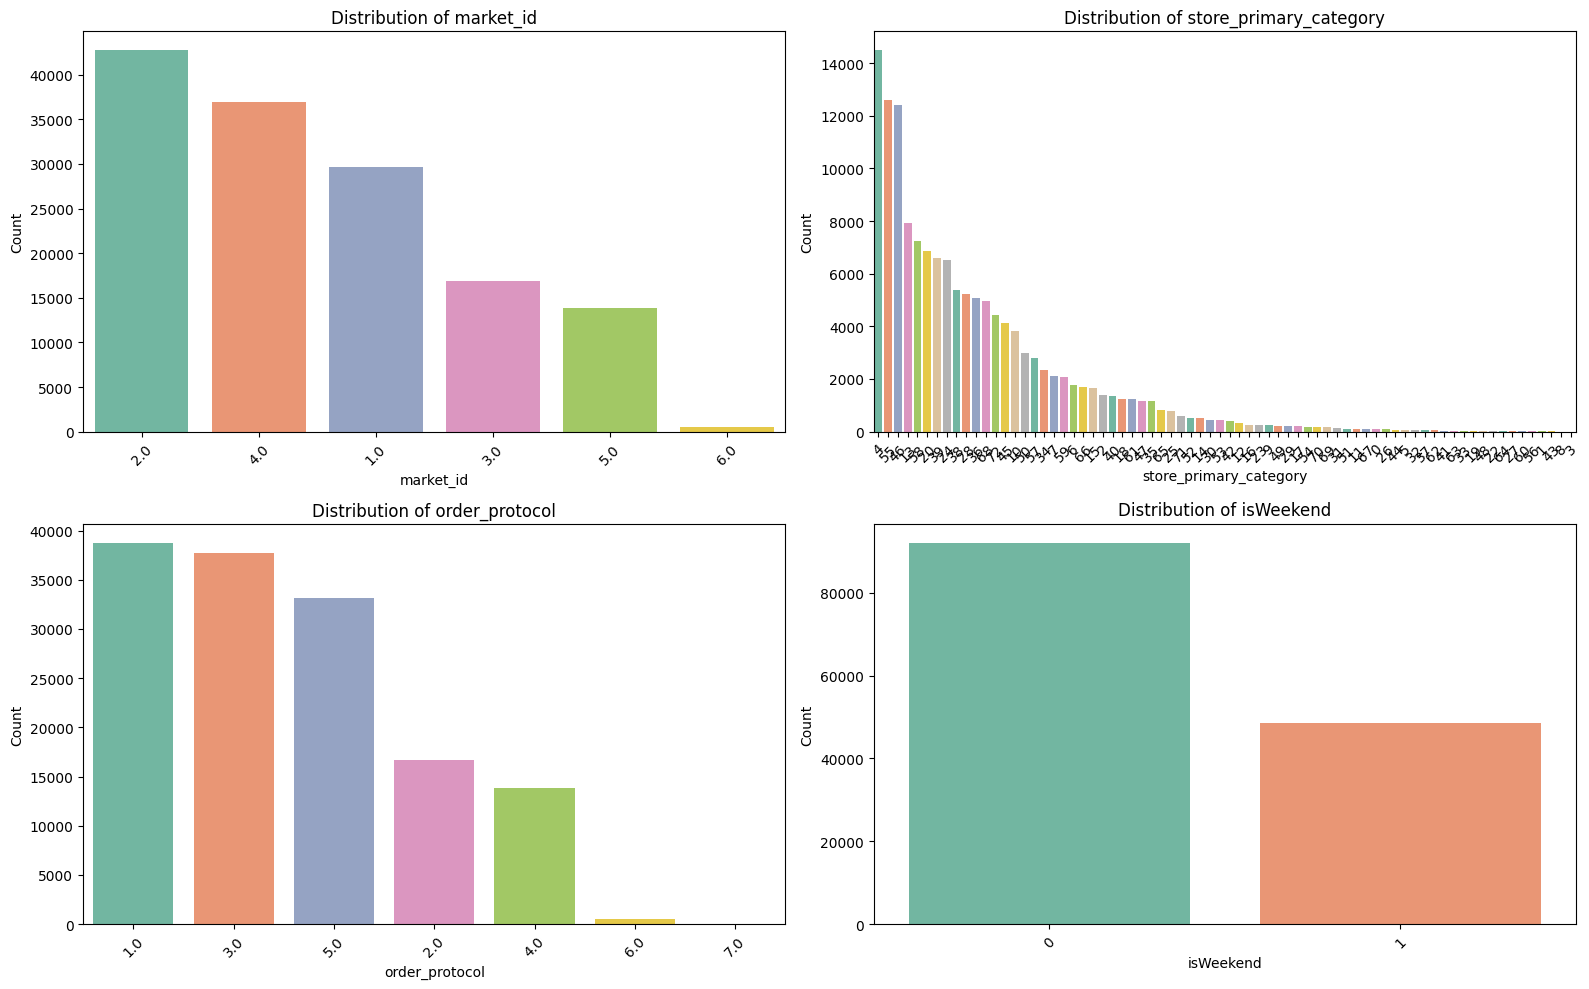

In [9]:
# Distribution of categorical columns

# Plot bar charts for each categorical feature
plt.figure(figsize=(16, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=X_train, x=col, order=X_train[col].value_counts().index, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

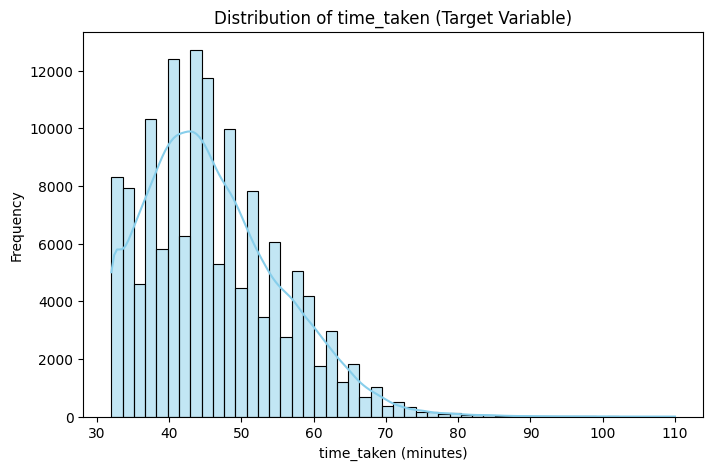

In [11]:
# Distribution of time_taken

plt.figure(figsize=(8, 5))
sns.histplot(y_train, kde=True, bins=50, color='skyblue')
plt.title("Distribution of time_taken (Target Variable)")
plt.xlabel("time_taken (minutes)")
plt.ylabel("Frequency")
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

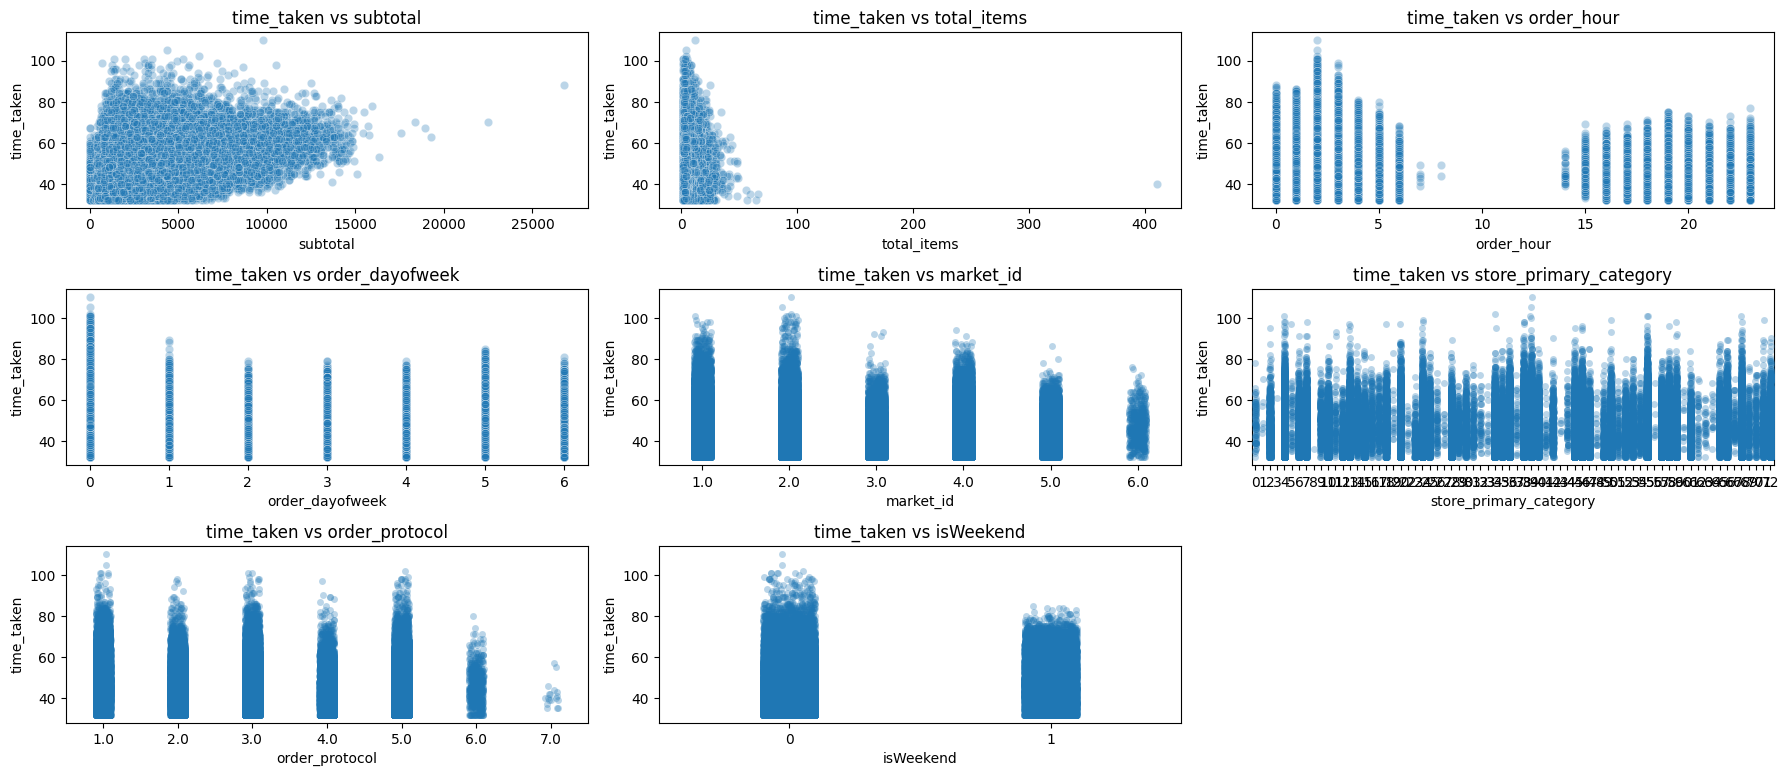

In [12]:
# Scatter plot to visualise the relationship between time_taken and other features


# Set of features
numerical_features = ['subtotal', 'total_items', 'order_hour', 'order_dayofweek']
categorical_features = ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']  # categorical but we'll still use scatter here


# Combine all features
all_features = numerical_features + categorical_features

# Create subplots (2 rows x 3 columns)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Flatten to index easily

for i, feature in enumerate(all_features):
    if feature in numerical_features:
        sns.scatterplot(data=train_data, x=feature, y='time_taken', ax=axes[i], alpha=0.3)
    else:
        sns.stripplot(data=train_data, x=feature, y='time_taken', ax=axes[i], jitter=True, alpha=0.3)
    axes[i].set_title(f'time_taken vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('time_taken')

# Hide any unused axes (if less than 6 features)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

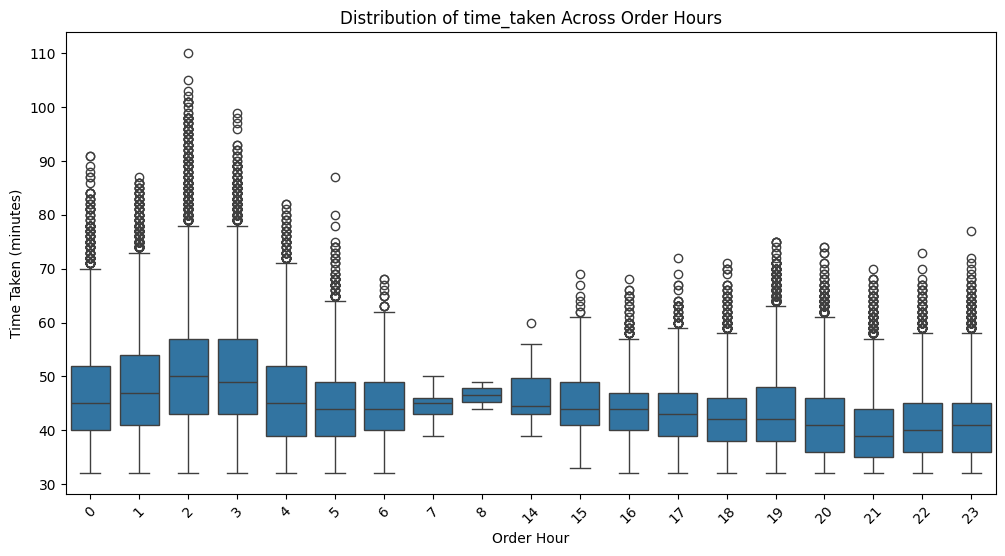

In [13]:
# Show the distribution of time_taken for different hours


plt.figure(figsize=(12, 6))
sns.boxplot(x='order_hour', y='time_taken', data=df)
plt.title('Distribution of time_taken Across Order Hours')
plt.xlabel('Order Hour')
plt.ylabel('Time Taken (minutes)')
plt.xticks(rotation=45)
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

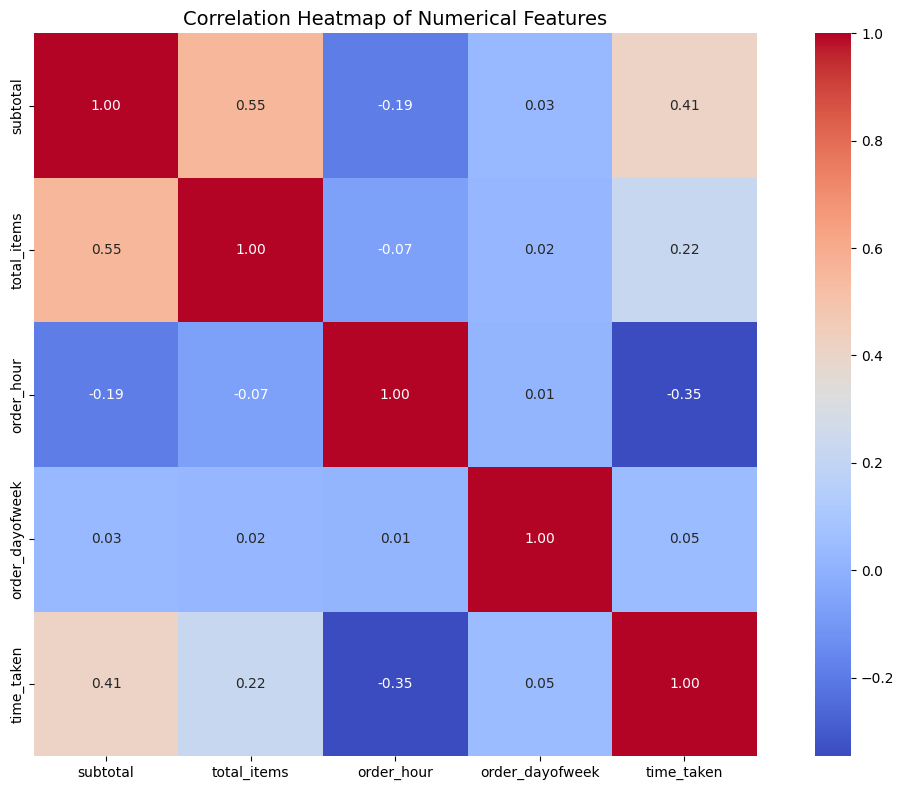

In [14]:
# Plot the heatmap of the correlation matrix

# Compute correlation matrix using selected numerical features
corr_matrix = df[numerical_features + ['time_taken']].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [32]:
# Drop 3-5 weakly correlated columns from training dataset

# Droping the weakly correlated features (correlation < 0.1) from training set
weak_corr_features = ['order_dayofweek']

df.drop(columns=weak_corr_features, inplace=True)
numerical_features.remove('order_dayofweek')

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

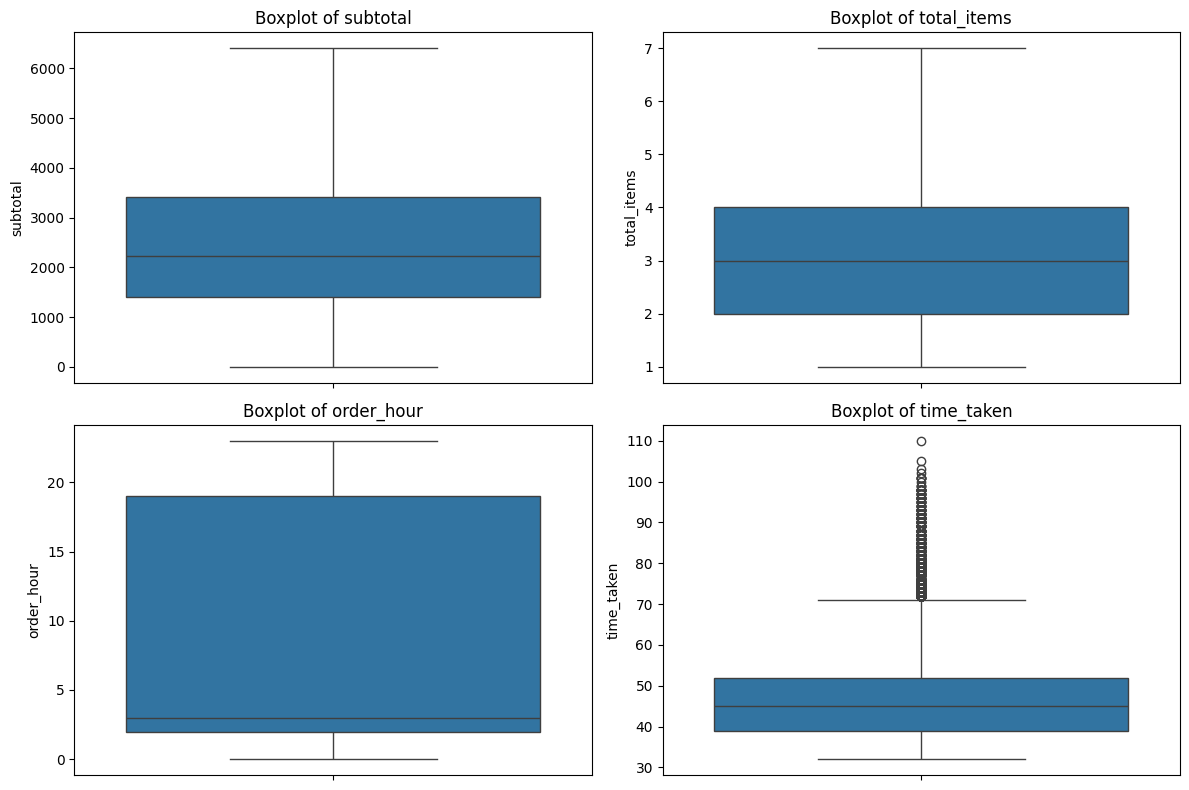

In [33]:
# Boxplot for time_taken

import math

# List of features to plot (numerical + target)
features_to_plot = numerical_features + ['time_taken']

# Calculate number of rows for 2 columns
n = len(features_to_plot)
rows = math.ceil(n / 2)

plt.figure(figsize=(12, rows * 4))  # Adjust width and height

for i, col in enumerate(features_to_plot):
    plt.subplot(rows, 2, i + 1)
    sns.boxplot(y=df[col])  # vertical orientation
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [19]:
# Handle outliers

def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip values outside bounds
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    print(f"Capped outliers in '{column}' beyond [{lower_bound:.2f}, {upper_bound:.2f}]")

# Apply capping
cap_outliers_iqr(df, 'subtotal')
cap_outliers_iqr(df, 'total_items')

Capped outliers in 'subtotal' beyond [-1585.00, 6407.00]
Capped outliers in 'total_items' beyond [-1.00, 7.00]


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [41]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE
import scipy.stats as stats


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [21]:
# Apply scaling to the numerical columns

# Initialize scaler
scaler = StandardScaler()

# Fit and transform on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [22]:
# Create/Initialise the model

model = LinearRegression()


In [23]:
# Train the model using the training data

model.fit(X_train_scaled, y_train)


LinearRegression()

In [24]:
# Make predictions

y_pred = model.predict(X_test_scaled)


In [25]:
# Find results for evaluation metrics

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")



Mean Absolute Error (MAE): 2.34
Root Mean Squared Error (RMSE): 3.22
R² Score: 0.8813


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

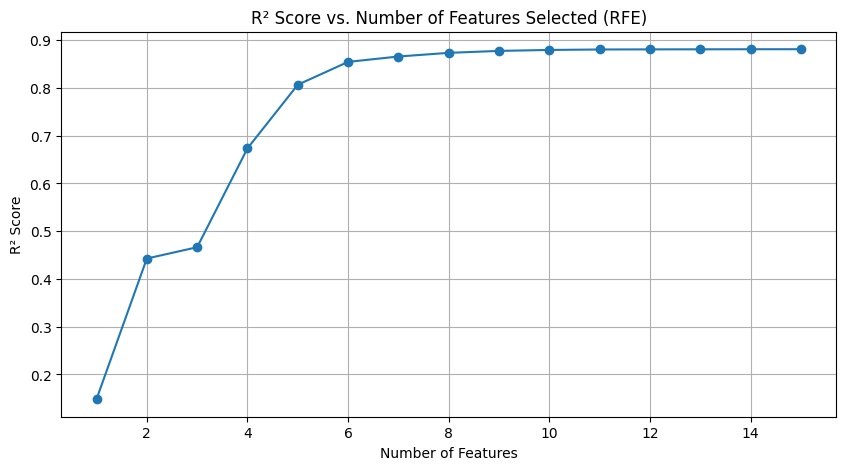

In [26]:
# Loop through the number of features and test the model

r2_scores = []
num_features_list = list(range(1, X_train_scaled.shape[1] + 1))

for n in num_features_list:
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=n)

    # Fit RFE on full feature set
    rfe.fit(X_train_scaled, y_train)

    # Get selected features
    selected_features_mask = rfe.support_

    # Subset both X_train and X_test using the mask
    X_train_rfe = X_train_scaled[:, selected_features_mask]
    X_test_rfe = X_test_scaled[:, selected_features_mask]

    # Fit model on selected features
    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_test_rfe)

    # Compute R² score
    score = r2_score(y_test, y_pred)
    r2_scores.append(score)

# Plot R² vs. number of features
plt.figure(figsize=(10, 5))
plt.plot(num_features_list, r2_scores, marker='o')
plt.title('R² Score vs. Number of Features Selected (RFE)')
plt.xlabel('Number of Features')
plt.ylabel('R² Score')
plt.grid(True)
plt.show()

In [27]:
# Build the final model with selected number of features


final_model = LinearRegression()
rfe_final = RFE(final_model, n_features_to_select=6)
rfe_final.fit(X_train_scaled, y_train)

# Apply RFE mask
selected_mask = rfe_final.support_
X_train_rfe = X_train_scaled[:, selected_mask]
X_test_rfe = X_test_scaled[:, selected_mask]

# Fit final model
final_model.fit(X_train_rfe, y_train)

# Predict
y_pred_final = final_model.predict(X_test_rfe)

# Evaluate
mse = mean_squared_error(y_test, y_pred_final)
mae = mean_absolute_error(y_test, y_pred_final)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_final)

print(f"Final Model with Top 6 Features")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Print feature names
selected_features = np.array(X.columns)[selected_mask]
print("Selected Features:", selected_features)

Final Model with Top 6 Features
MAE: 2.62
RMSE: 3.57
R² Score: 0.8548
Selected Features: ['subtotal' 'total_onshift_dashers' 'total_busy_dashers'
 'total_outstanding_orders' 'distance' 'order_hour']


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

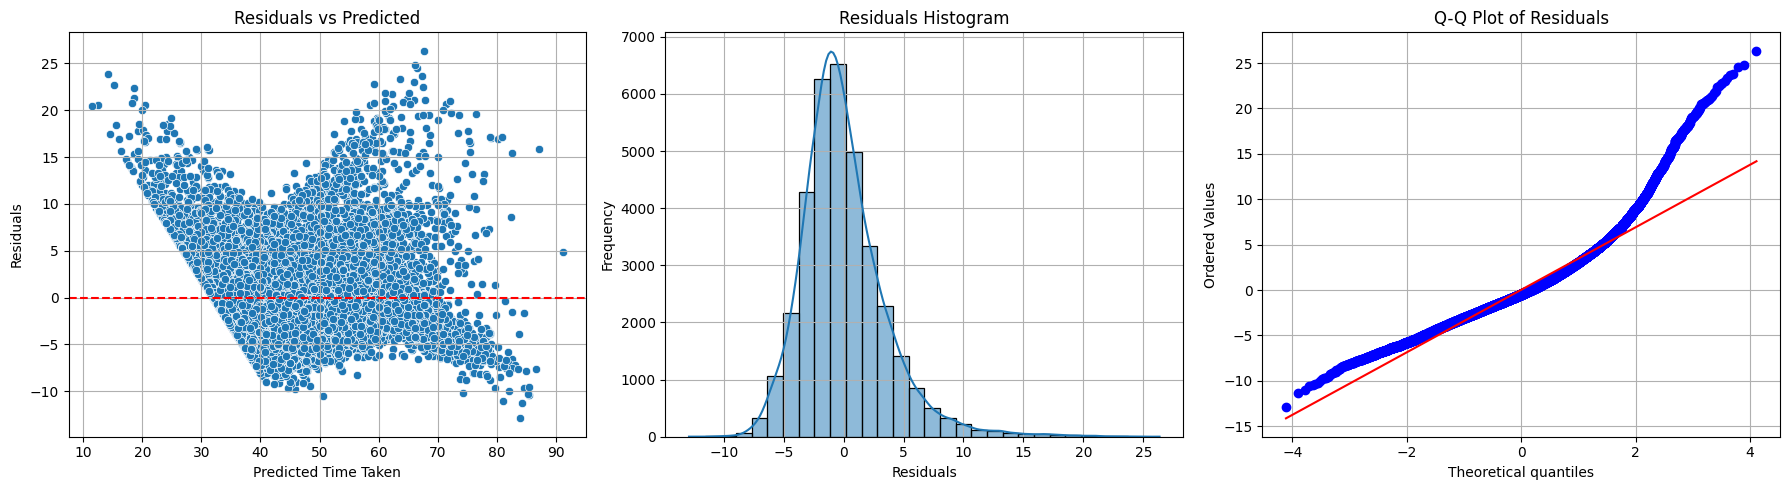

In [39]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

# Calculate residuals
residuals = y_test - y_pred_final

# Set up the layout: 1 row, 3 plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Residuals vs Predicted
sns.scatterplot(x=y_pred_final, y=residuals, ax=axes[0])
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title('Residuals vs Predicted')
axes[0].set_xlabel('Predicted Time Taken')
axes[0].set_ylabel('Residuals')
axes[0].grid(True)

# Plot 2: Histogram of Residuals
sns.histplot(residuals, bins=30, kde=True, ax=axes[1])
axes[1].set_title('Residuals Histogram')
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

# Plot 3: Q-Q Plot
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot of Residuals')
axes[2].grid(True)

plt.tight_layout()
plt.show()


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [42]:
# Compare the scaled vs unscaled features used in the final model


# Step 1: Get selected feature names
selected_features = np.array(X.columns)[rfe_final.support_]

# Step 2: Scaled coefficients
scaled_coefs = final_model.coef_

# Step 3: Get standard deviation of unscaled features
feature_stds = X_train[selected_features].std().values

# Step 4: Compute unscaled coefficients
unscaled_coefs = scaled_coefs / feature_stds

# Step 5: Create dataframe to compare
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Scaled Coefficient': scaled_coefs,
    'Std Dev': feature_stds,
    'Unscaled Coefficient (approx impact)': unscaled_coefs
}).sort_values(by='Unscaled Coefficient (approx impact)', key=abs, ascending=False)

# Display the result
print(coef_df.to_string(index=False))

                 Feature  Scaled Coefficient     Std Dev  Unscaled Coefficient (approx impact)
                distance            4.178375    8.751147                              0.477466
   total_onshift_dashers          -12.860069   34.572455                             -0.371974
total_outstanding_orders           18.509648   52.773640                              0.350737
              order_hour           -2.247078    8.677293                             -0.258961
      total_busy_dashers           -4.576416   32.197755                             -0.142135
                subtotal            3.115995 1830.808391                              0.001702


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>